In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
Room_revenue_region = pd.read_csv('Room_revenue_region.csv')
del Room_revenue_region[0]
Regions = pd.read_csv('Vancouver_Regions.csv')
Regions.columns =['y','x']

Total_room_revenue = pd.read_csv('Total_room_revenue.csv')
Region_codes = pd.read_csv('region_codes.csv')

In [58]:
Region_codes.head()

,region_code,region_name,Composition,Description
0,DR01,Vancouver Island/Coast,"RD 17, 19, 21, 23, 25, 43, 45",NaN
1,DR02,Mainland/Southwest,"RD 09, 15, 29, 31",NaN
2,DR03,Thompson/Okanagan,"RD 07, 33, 35, 37, 39",NaN
3,DR04,Kootenay,"RD 01, 03, 05",NaN
4,DR05,Cariboo,"RD 41, 53",NaN


In [59]:
region_dict = {}
n = len(Region_codes['region_code'])

for i in range(0,n):
    region_dict[Region_codes['region_code'][i]] = Region_codes['region_name'][i]
    

reverse_dict = {}    

for i in range(0,n):
    reverse_dict[Region_codes['region_name'][i]] = Region_codes['region_code'][i] 

Capital


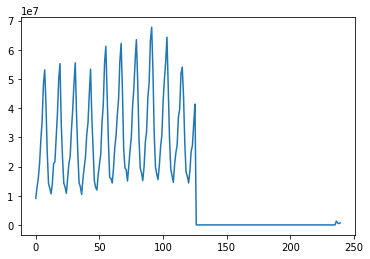

Victoria


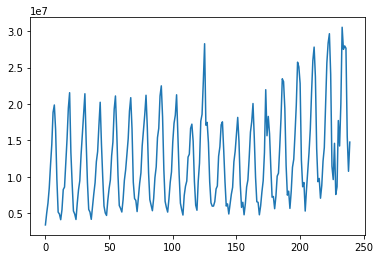

Saanich Peninsula


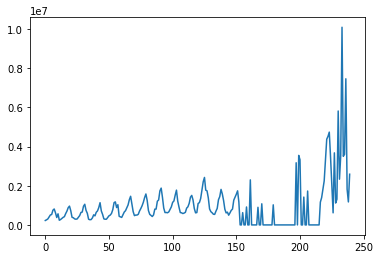

Cowichan Valley


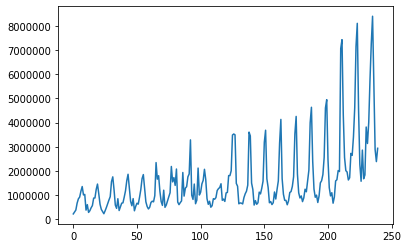

Tofino


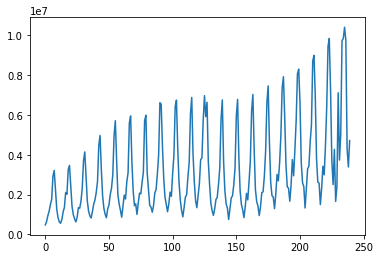

Ucluelet


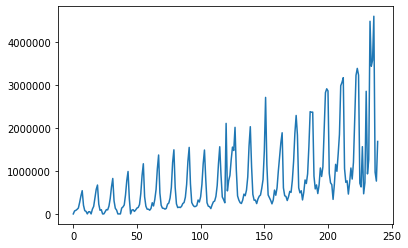

Campbell River


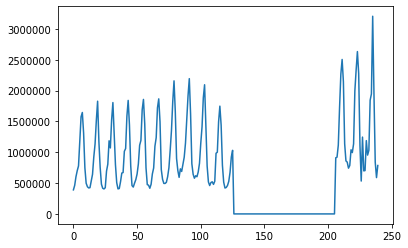

Fraser Valley


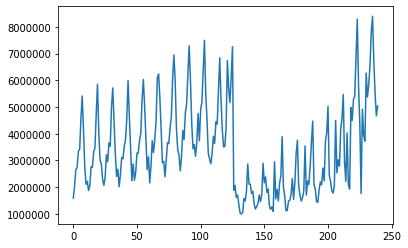

Hope


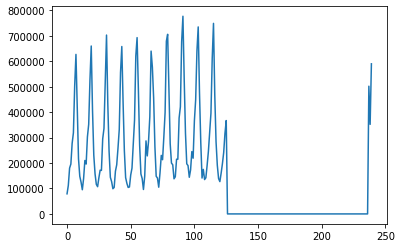

Greater Vancouver


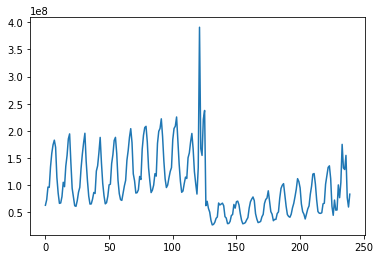

Richmond


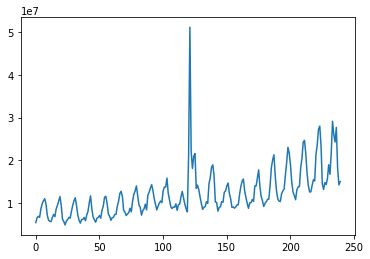

Burnaby


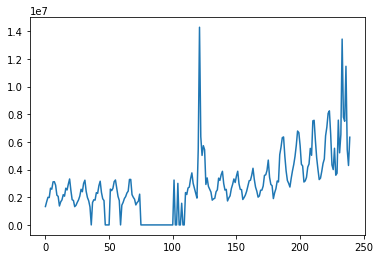

Squamish-Lillooet


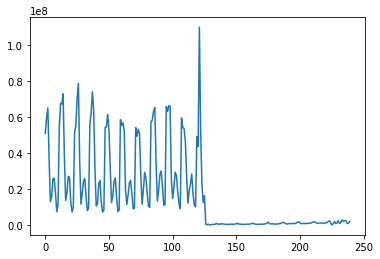

Whistler


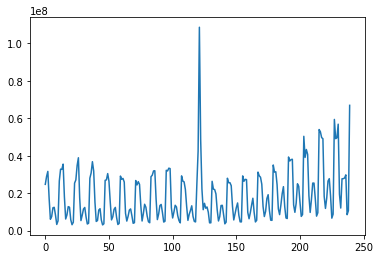

Penticton


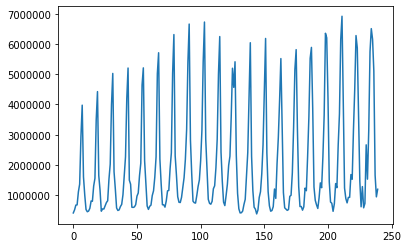

Osoyoos


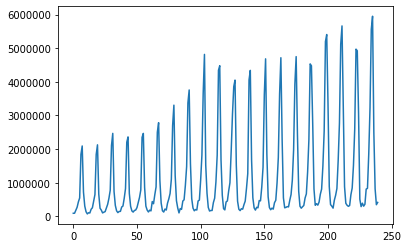

Thompson-Nicola


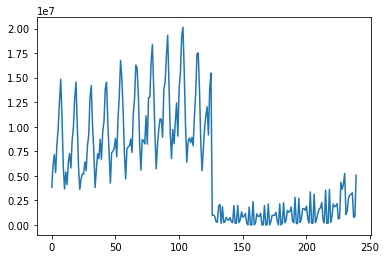

Kamloops


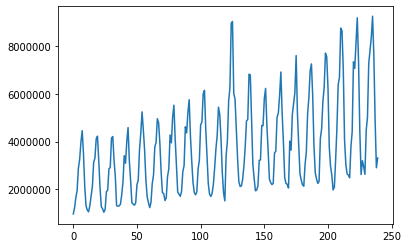

Kelowna


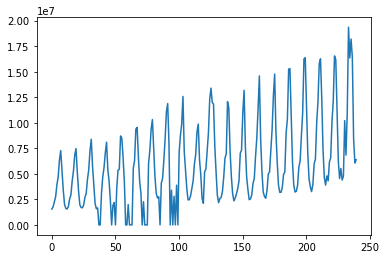

Vernon


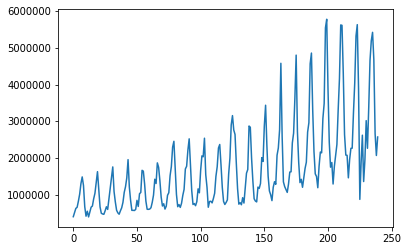

Columbia-Shuswap


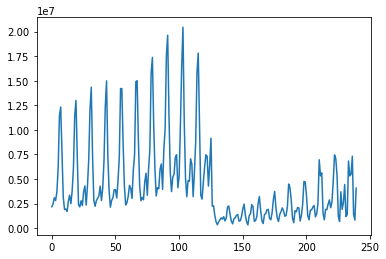

Revelstoke


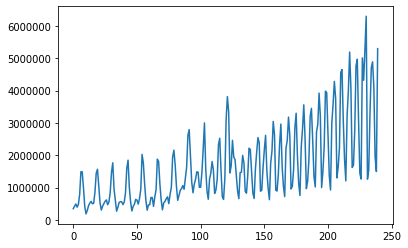

East Kootenay


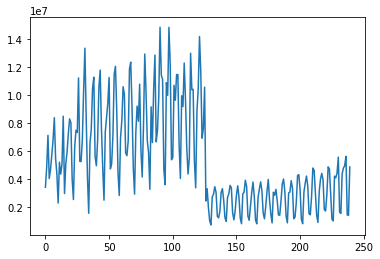

Cranbrook


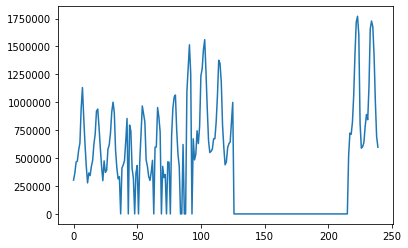

Kimberley


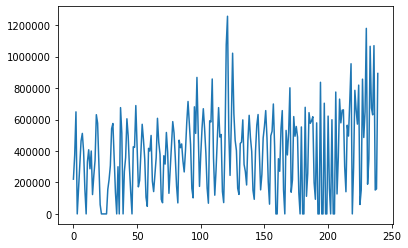

Valemount/Robson Valley


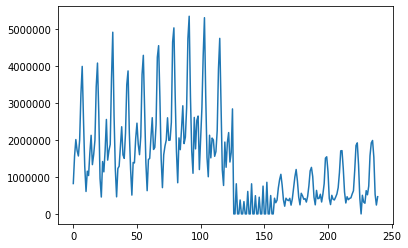

Nelson


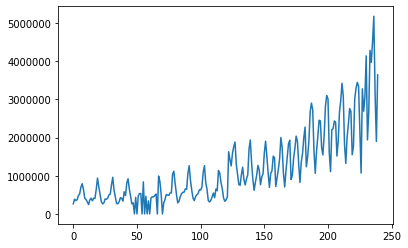

Kootenay Boundary


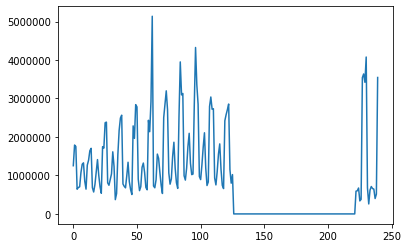

Cariboo


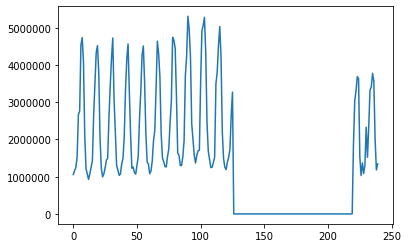

Prince Rupert


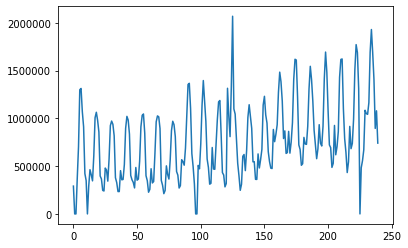

Kitimat-Stikine


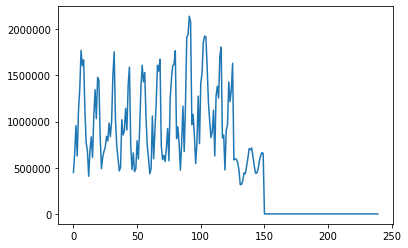

Smithers


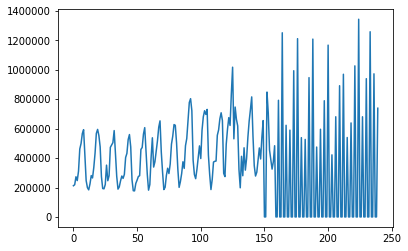

In [70]:
n = len(Room_revenue_region.columns)

Room_revenue_region.columns = range(0,n)

for i in range(0,n):
    revenues = Room_revenue_region[i]
   
    plt.plot(revenues)
    print(region_dict[Regions.iloc[i][1]])
    
    plt.show()

In [61]:
Nearby_regions = ['Vernon','Kelowna','Kamloops','Whistler','Burnaby','Richmond','Victoria','Cowichan Valley']

In [69]:
Room_revenue_region.columns = Regions['x']
total_revenue = [0] * len(Room_revenue_region['RD17'])

for i in range(0,len(Nearby_regions)):
        region_id = reverse_dict[Nearby_regions[i]]
        revenue = Room_revenue_region[region_id]
        total_revenue = revenue + total_revenue


Room Revenue of locations close to the olympic venues (roughly sub 4 hour drive)


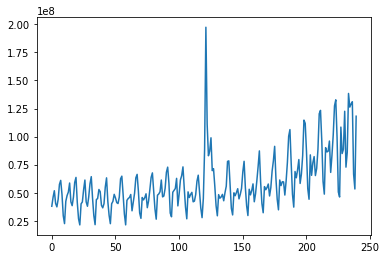

In [71]:
print('Room Revenue of locations close to the olympic venues (roughly sub 4 hour drive)')
plt.plot(total_revenue)

In [97]:
vancouver_visits = pd.read_csv('vancouver_visits.csv')
vancouver_visits.head()


de_seasoned = [0] *288

for i in range(12,300):
    de_seasoned[i-12] = (vancouver_visits['value'].iloc[i] - vancouver_visits['value'].iloc[i-12]) #/ vancouver_visits['value'].iloc[i-12]

   

,year,month,value
0,1994,1,320101
1,1994,2,315660
2,1994,3,429018
3,1994,4,443933
4,1994,5,550832


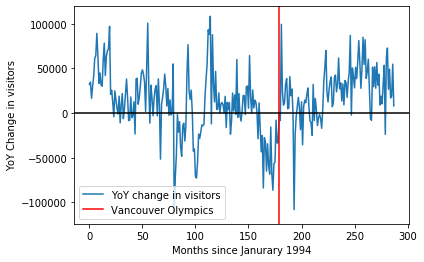

In [127]:

ax = plt.subplot()
ax.plot(vancouver_visits['value'], label = 'Number of visitors')
#plt.title('Vancouver monthly visits')
ax.axvline(x=191,color='r',label = 'Vancouver Olympics')
ax.set_xlabel('Months since Janurary 1994')
ax.set_ylabel('# of People Visiting')
ax.legend()
plt.savefig('Vancouver_Monthly_Visitors')
plt.show()





ax2 = plt.subplot()
ax2.plot(de_seasoned,label = 'YoY change in visitors') 
#plt.title('Vancouver monthly visits - YoY change')
ax2.axvline(x=179,color='r',label = 'Vancouver Olympics')
ax2.axhline(y=0,color = 'k')
ax2.set_xlabel('Months since Janurary 1994')
ax2.set_ylabel('YoY Change in visitors')
ax2.legend()
plt.savefig('Vancouver_Monthly_Visitors_YoY')

In [94]:
def de_season(series,season):
    de_seasoned = [0] * (len(series) - season)
    for i in range(season,len(series)):
        de_seasoned[i-season] = (series[i] - series[i-season]) 
    
    return de_seasoned

In [95]:
room_rental_deseasoned = de_season(total_revenue,12)

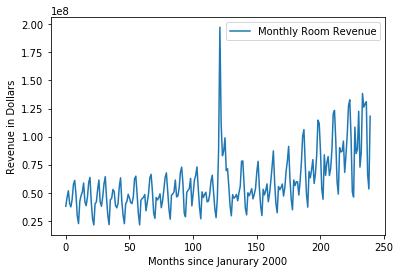

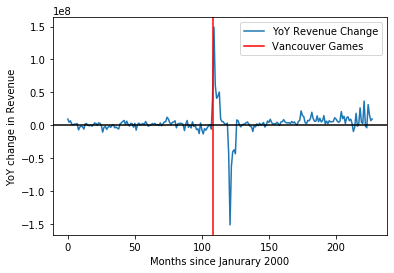

In [124]:
ax = plt.subplot()

ax.plot(total_revenue,label = 'Monthly Room Revenue')
#plt.title('Vancouver Area Monthly Room Revenue')
ax.set_xlabel('Months since Janurary 2000')
ax.set_ylabel('Revenue in Dollars')
ax.legend()
plt.savefig('Vancouver_Area_Room_Revenue')
plt.show()



ax2 = plt.subplot()
ax2.plot(room_rental_deseasoned, label = 'YoY Revenue Change')
#plt.title('Vancouver Area Monthly Room Revenue - YoY Change')
ax2.set_xlabel('Months since Janurary 2000')
ax2.set_ylabel('YoY change in Revenue')
ax2.axvline(x=108,color='r',label = 'Vancouver Games')
ax2.axhline(y=0,color = 'k')
ax2.legend()
plt.savefig('Vancouver_Area_Deseasoned_Room_Revenue')